# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [92]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [93]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/workspace/task.py:37: RuntimeWarning: invalid value encountered in sqrt
  difference = abs(self.sim.pose[:3] - self.target_pos)


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

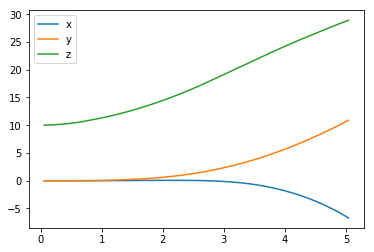

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

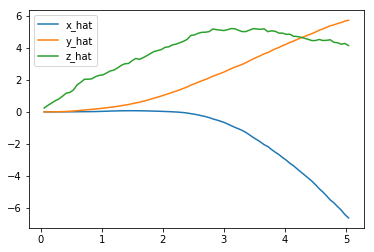

In [95]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

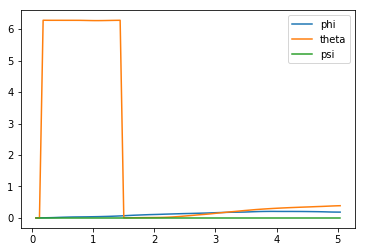

In [96]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

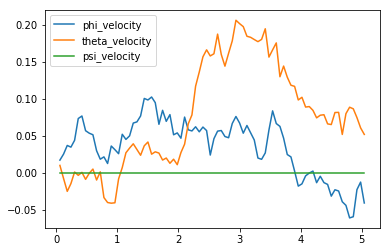

In [97]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

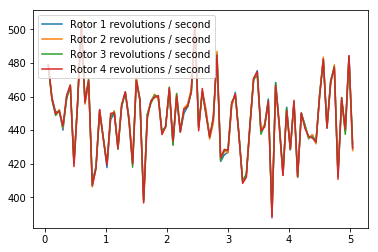

In [98]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [99]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.69835135  10.89503336  28.91167006   0.18401541   0.38813922   0.        ]
[-6.62178892  5.72301944  4.14356742]
[-0.04042213  0.05198978  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [123]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state    
        
        if done:
            
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
            
            
            sys.stdout.flush()

Episode = 1000, score =  -5.491 (best =  -4.068), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [126]:
## TODO: Train your agent here.

from agents.agent import DDPG
num_episodes = 200
target_pos = np.array([10., 10., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task)
ddpg_reward = []
ddpg_episode = np.arange(num_episodes)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            # print(reward)  # [debug]
            ddpg_reward.append(reward)
            break
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

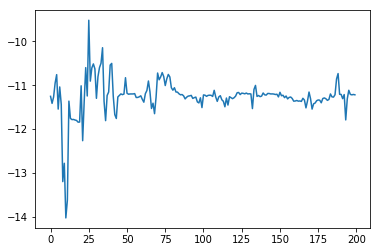

In [127]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ddpg_episode, ddpg_reward, label='DDPG Reward')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The Task for the quadcoptor was to fly to the specified position, as defined by the user.  I designed the reward function so that quadcopter was rewarded more if it was closer to the target distance.  I wanted this reward function to be exponential so that the reward for being closer was exponentially greater than being farther from the target.

I tried multiple reward functions in various forms, some (but not all) are shown below:

#reward = 1.-.5*(abs(self.sim.pose[:3] - self.target_pos)).sum()
#reward = 1. - ((self.sim.pose[:3] - self.target_pos)**2).sum()
#reward = (100. - (abs(self.sim.pose[:3] - self.target_pos)**0.4).sum())/100
#reward = (1. - 0.5*(abs(self.sim.pose[:3] - self.target_pos)**0.5).sum())

Reference:  I used https://bons.ai/blog/reward-functions-reinforcement-learning-video for help designing the rewards function.  

Upon suggestion from my last code review, I also tried giving an additional reward if the agent got to the desired x, y, or z position.  I also doubled the reward if the current position matched the target position exactly.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

**Answer**:

- What learning algorithm(s) did you try? What worked best for you?

I used a DDPG agent with replay buffer, as shown in the resources section of this project.  I chose this method to explore because I wanted to work with continuous action and state spaces without discretizing.  This method uses function approximation using two copies of the agent and two copies of the critic.  The actor determins the policy, and the critic evalutes the value policy.  




- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

I chose:

alpha = N/A for DDPG algorithm
beta = N/A for this DDPG algorithm
gamma = 0.95
epsilon = N/A for DDPG algorithm
tau 0.01
batch size = 64
exploration mu = 0.5
exploration theta = 0.2
exploration sigma = 0.4

Gamma is the Discount Rate.  When gamma = 0, the agent will only care about the most immediate reward.  When gamma = 1, the agent will care equally about distant reward as immediate reward.  General rule of thumb is to keep the gamma much closer to 1 than to 0.  I tried various gamma (0.99, 0.90, 0.95, and 0.80).  I picked gamma=0.95 so that the agent will be a little more interested in the immediate reward, but still interested in the future rewards.

Tau is the soft update parameter used to update the weights.

The Batch size is the sample of the replay buffer (or "memory") to use for learning from past.  I experimented with this by increasing it from 64 to 128--but this gave me worse performance, so I went back to batch size = 64.

Batch size is the size of the replay buffer to sample.  I increased this from 64 to 128 so that the agent could learn from a larger set of it's "memory."

I also tried to increase exploration mu, theta, and sigma to encourage the agent in more exploratory actions.

The DDPG agent does not appear to use either epsilon or alpha.

Alpha and Beta are learning rates for iterative action-value function and state-value function estimates.  These are not utilized by DDPG because DDPG is a function approximator for continuous action and state spaces.  It does not iteratively calculate action-value and state-value functions as would be needed when working with discrete action and state spaces.

Epsilon is also not utilized a DDPG agent because DDPG has a continuous action space.  For agents working with discrete action spaces, an epsilon-greedy policy will choose the action that will maximize the reward.  The value of epsilon would range 0-1.  When epsilon is closer to 0, it will be greedier.  When the agent needs to be more exploratory, epsilon would need to be closer to 1. 

If I had been working with discrete action spaces or if I had chosen to use a different agent that would require me to discretize the action space, I would need to specify epsilon.  In that case, if I was using an actor-critic model, I would have chosen an epsilon value closer to 1 for the actor (so that it can be more exploratory).  The critic would then evalute the policy that the actor is following.  Later, the final agent could have a more epsilon-greedy.  




- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

I tried various layer sizes for the DDPG agent, including (but not limited to):

Try 1:
agents: 32, 64, 32
critics: 32, 64, 32

Try 2: 
agents: 32, 64, 32, 64, 32
critics: 32, 64

Try 3:
agents:  32, 64, 128
critics: 32, 64, 128

Try 4:
agents:  32, 64
critics: 32, 64

Try 5: 
agents:  32, 64
critics: 32, 64
Upon suggestion from the code review, I added Batch Normalization and Dropout layers just before the final layer.

Surprisingly, adding more layers actually did not give me better performance when I looked at the reward plots.  I ended up choosing fewer hidden layers.

I tried both relu and tanh activations for the hidden layers.  
I used adam for optimization. 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

**Answer**:

- Was it an easy task to learn or hard?

The task appeared to be difficult to learn, but I believe this is because I have not chosen the reward function properly.  It did appear to learn a little bit after episode 50, but the behavior is not ideal.  

I tried various rewards functions, and sometimes I went up to 1000 episodes--but the behavior usually plateaus after around 100 episodes for most of the alorithms I tried.  

I modified the rewards function several times.  

- Was there a gradual learning curve, or an aha moment?

The final Task I chose and the reward seemed to have more a gradual learning curve.

- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

The final performance of the agent was not very good, but it did appear to increase toward a value of 0 in the last 10 episodes (compared to -15 in some other earlier cases).


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

**Answer**:

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)

I struggled a lot with this project.  The hardest part was understanding where to start.  Most of the content in this section focused on RN algorithms for discrete state and action spaces.  It took me a lot of time (multiple times listening to the lectures) to understand that most of what I learned does not apply to continuous action and state spaces. 

I also had a difficult time trying to learn how to build an effective rewards function.  I think more practice in this area and more examples would have helped me.  I'm still not sure if my rewards function is rewarding the behavior I need from the agent. 

- Did you find anything interesting in how the quadcopter or your agent behaved?

I think the most surprising part of this project was that I thought I would get better performance by increasing the number of hidden layers in the neural networks.  This was not the case.  I actually got better performance with fewer layers.

Changing the rewards function even a little had noticeable affects on the final outcome.  I believe defining a proper rewards function is really the key to getting the DDPG agent to learn properly.
